In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import os.path

In [2]:
scenarios_folder = '~/Developer/interscsimulator/mock-simulators/smart_city_model/'
digital_rails_events_filename = os.path.expanduser(scenarios_folder + 'av_paulista_digital_rails_scenario/av_paulista_digital_rails_scenario.events.xml')
regular_events_filename = os.path.expanduser(scenarios_folder + 'av_paulista_regular_scenario/av_paulista_regular_scenario.events.xml')

2100 cars per hour in each direction, during 3 hours

In [3]:
def parse_arrivals(filename):
    tree = ET.parse(filename)
    root = tree.getroot()

    events = []
    for child in root:
        if child.attrib['type'] == 'arrival':
            # Sample arrival event:
            # <event time="918" type="arrival" person="paraiso5_79" vehicle="paraiso5_79" 
            #     link="40" legMode="car" trip_time="205" distance="2825" action="ok"/>

            trip_time = int(child.attrib['trip_time'])
            distance = int(child.attrib['distance'])

            events.append({'trip_time_s': trip_time, 'distance_m': distance})

    return pd.DataFrame(events)

In [4]:
re = parse_arrivals(regular_events_filename)
dr = parse_arrivals(digital_rails_events_filename)

# Trip times #

## Regular Scenario ##

In [5]:
re['avg_speed_m/s'] = re['distance_m'] / re['trip_time_s']
re['avg_speed_km/h'] = re['avg_speed_m/s'] * 3.6

re.describe()

,distance_m,trip_time_s,avg_speed_m/s,avg_speed_km/h
count,12600.00000,12600.000000,12600.000000,12600.000000
mean,2729.50000,358.138095,7.683250,27.659701
std,95.50379,33.987468,0.697153,2.509750
min,2634.00000,285.000000,6.069124,21.848848
25%,2634.00000,335.000000,7.118919,25.628108
50%,2729.50000,353.000000,7.769912,27.971681
75%,2825.00000,384.000000,8.188406,29.478261
max,2825.00000,437.000000,9.242105,33.271579


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x133ff39b0>]], dtype=object)

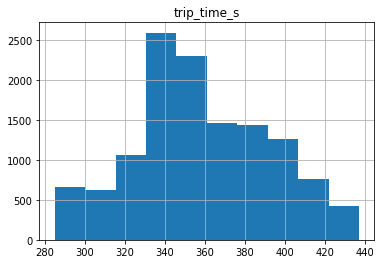

In [6]:
(re[['trip_time_s']]).hist()

## Digital Rails scenario ##

In [7]:
dr['avg_speed_m/s'] = dr['distance_m'] / dr['trip_time_s']
dr['avg_speed_km/h'] = dr['avg_speed_m/s'] * 3.6

dr.describe()

,distance_m,trip_time_s,avg_speed_m/s,avg_speed_km/h
count,12600.00000,12600.000000,12600.000000,12600.000000
mean,2729.50000,198.000000,13.785532,49.627915
std,95.50379,7.000278,0.005044,0.018159
min,2634.00000,191.000000,13.780488,49.609756
25%,2634.00000,191.000000,13.780488,49.609756
50%,2729.50000,198.000000,13.785532,49.627915
75%,2825.00000,205.000000,13.790576,49.646073
max,2825.00000,205.000000,13.790576,49.646073


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12e395ef0>]], dtype=object)

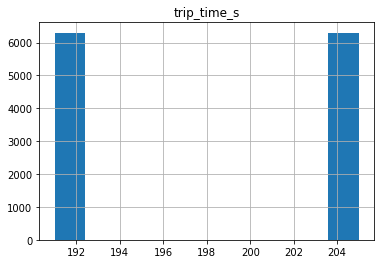

In [8]:
(dr[['trip_time_s']]).hist()

In [9]:
dr['trip_time_s'].mean() / re['trip_time_s'].mean()

0.55285936523554369

## Vehicle throughput ##

In [10]:
def parse_left_link(filename, link_id):
    tree = ET.parse(filename)
    root = tree.getroot()

    events = []


    for child in root:
        # Sample event:
        # <event time="2897" type="entered link" person="2_11" link="8" vehicle="2_11" action="ok" />
        
        if child.attrib['type'] == 'left link' and child.attrib['link'] == link_id:
            events.append({'left_link_time': int(child.attrib['time'])})

    return pd.DataFrame(events)

In [11]:
re = pd.concat([
    parse_left_link(regular_events_filename, '395'), # Sentido consolação
    parse_left_link(regular_events_filename, '379')  # Sentido paraíso
])

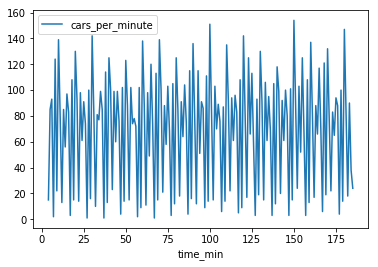

In [12]:
re['time_min'] = np.floor(re['left_link_time'] / (1 * 60))

re.groupby('time_min').count().rename(columns={'left_link_time':'cars_per_minute'}).plot()

In [13]:
dr = pd.concat([
    parse_left_link(digital_rails_events_filename, '395'), # Sentido consolação
    parse_left_link(digital_rails_events_filename, '379')  # Sentido paraíso
])

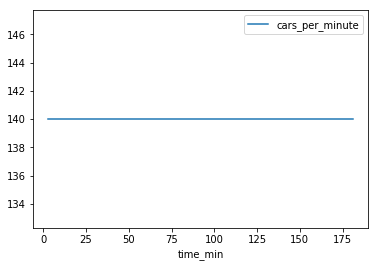

In [14]:
dr['time_min'] = np.floor(dr['left_link_time'] / (1 * 60))

dr.groupby('time_min').count().rename(columns={'left_link_time':'cars_per_minute'}).plot()